In [24]:
import pandas as pd
import tensorflow_hub as hub
df = pd.read_csv("mentalKalimat.txt", sep=",")

In [25]:
df.head()

,kalimat,kelas
0,istri dipukul suami,kekerasan
1,anak menerima kekerasan terus menerus oleh ora...,kekerasan
2,ayah dianiaya mertua,kekerasan
3,bibi dipukul paman,kekerasan
4,adik menerima kekerasan terus menerus oleh ora...,kekerasan


In [26]:
df.tail()

,kalimat,kelas
24,idih goblog,toxic
25,aduh ler sini gw ajarin dah,toxic
26,"woi, si conge dateng nih",toxic
27,makan apa luh tod,toxic
28,pada dateng ke rumah gw ya bangsat,toxic


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kalimat  29 non-null     object
 1   kelas    29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [28]:
df.kelas

0     kekerasan
1     kekerasan
2     kekerasan
3     kekerasan
4     kekerasan
5     kekerasan
6     kekerasan
7     kekerasan
8     kekerasan
9     kekerasan
10       ejekan
11       ejekan
12       ejekan
13       ejekan
14       ejekan
15       ejekan
16       ejekan
17       ejekan
18       ejekan
19        toxic
20        toxic
21        toxic
22        toxic
23        toxic
24        toxic
25        toxic
26        toxic
27        toxic
28        toxic
Name: kelas, dtype: object

In [29]:
kategori = pd.get_dummies(df.kelas)
df_baru = pd.concat([df, kategori], axis=1)
df_baru = df_baru.drop(columns='kelas')
df_baru

,kalimat,ejekan,kekerasan,toxic
0,istri dipukul suami,0,1,0
1,anak menerima kekerasan terus menerus oleh ora...,0,1,0
2,ayah dianiaya mertua,0,1,0
3,bibi dipukul paman,0,1,0
4,adik menerima kekerasan terus menerus oleh ora...,0,1,0
5,kakak dianiaya paham,0,1,0
6,pemuda yang diusir dari rumah karena menerima ...,0,1,0
7,mata bengkak,0,1,0
8,aku menerima pukulan terus menerus,0,1,0
9,muka dia lebam karena dipukul orang tua,0,1,0


In [30]:
kalimat = df_baru['kalimat'].values
label = df_baru[['ejekan', 'kekerasan', 'toxic']].values

In [31]:
from sklearn.model_selection import train_test_split
kalimat_latih, kalimat_test, label_latih, label_test = train_test_split(kalimat, label, test_size=0.2)

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=100, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [33]:
import tensorflow as tf
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-id-dim50-with-normalization/1", output_shape=[50],
                           input_shape=[], dtype=tf.string, trainable = False)

In [34]:
hub_layer(tf.constant(["Anak dipukul"]))

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[-0.18270946, -0.26063266, -0.17302665,  0.08832797, -0.16755353,
         0.0185422 ,  0.1074583 ,  0.07263496,  0.20654094,  0.00169873,
        -0.05886513, -0.09213956,  0.20109184, -0.0364674 , -0.15355045,
        -0.19250156,  0.0681413 ,  0.03455477, -0.13147347, -0.09592412,
         0.15341908,  0.08071964, -0.26589397, -0.01556084, -0.25022194,
        -0.21811162, -0.06710475, -0.22922243,  0.07994812,  0.19668005,
         0.1130928 ,  0.07319149,  0.06421153, -0.05644623,  0.0453389 ,
         0.00899981,  0.03085187,  0.19654204, -0.0110861 , -0.17021134,
        -0.16187018,  0.00711688,  0.1377006 ,  0.12656587,  0.07617143,
        -0.2370022 , -0.0918615 , -0.13997926, -0.10815646,  0.01568504]],
      dtype=float32)>

In [35]:
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

In [51]:
def build_model(hub_module, name):
    model = Sequential([
    hub_module,
    Dense(16, activation = 'relu'),
    Dense(3, activation = 'sigmoid')], name = name)
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [52]:
def train_and_evaluate(train_data, val_data, model, batch_size=8):
    X_train, Y_train = train_data
    
    tf.random.set_seed(10)
    
    history = model.fit(
    X_train, Y_train,
    epochs = 700,
    batch_size = batch_size,
    validation_data = val_data,
    )
    
    return history

In [53]:
data = (kalimat_latih, label_latih)
val_data = (kalimat_test,label_test)

In [54]:
model_v2 = build_model(hub_layer, 'modelV2')
model_history = train_and_evaluate(data, val_data, model_v2)

Epoch 1/700
3/3 [==============================] - 1s 82ms/step - loss: 1.1588 - accuracy: 0.2609 - val_loss: 1.0844 - val_accuracy: 0.5000
Epoch 2/700
3/3 [==============================] - 0s 12ms/step - loss: 1.1388 - accuracy: 0.2609 - val_loss: 1.0773 - val_accuracy: 0.5000
Epoch 3/700
3/3 [==============================] - 0s 12ms/step - loss: 1.1244 - accuracy: 0.3043 - val_loss: 1.0715 - val_accuracy: 0.3333
Epoch 4/700
3/3 [==============================] - 0s 11ms/step - loss: 1.1076 - accuracy: 0.3478 - val_loss: 1.0667 - val_accuracy: 0.5000
Epoch 5/700
3/3 [==============================] - 0s 13ms/step - loss: 1.0944 - accuracy: 0.3913 - val_loss: 1.0629 - val_accuracy: 0.5000
Epoch 6/700
3/3 [==============================] - 0s 12ms/step - loss: 1.0801 - accuracy: 0.3913 - val_loss: 1.0598 - val_accuracy: 0.5000
Epoch 7/700
3/3 [==============================] - 0s 11ms/step - loss: 1.0656 - accuracy: 0.3913 - val_loss: 1.0556 - val_accuracy: 0.5000
Epoch 8/700
3/3 [===

In [55]:
predicted=model_v2.predict(["dia wajahnya lebam dihajar orang tuanya"])
print(predicted)

[[0.5365032  0.8181517  0.00759241]]


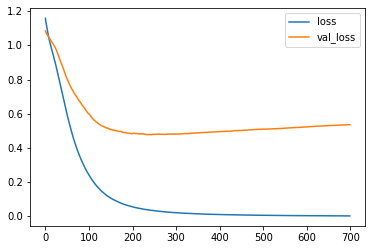

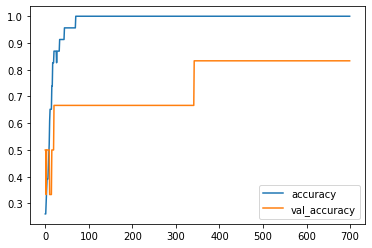

In [56]:
history_plot = model_history
pd.DataFrame(history_plot.history)[['loss', 'val_loss']].plot()
pd.DataFrame(history_plot.history)[['accuracy', 'val_accuracy']].plot()

In [57]:
predicted=model_v2.predict(["teman kerja sering menghina dia seperti goblog dan tolol serta sering memukul dia"])
print(predicted)

[[0.46593913 0.25950253 0.15683708]]


In [58]:
model_v2.save("model_v2.h5")